<a href="https://colab.research.google.com/github/Percy-O/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
data = pd.read_csv('drive/MyDrive/loan/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.shape

(4269, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Data Cleaning

In [ ]:
data = data.drop(['loan_id',' no_of_dependents'],axis=1)

In [ ]:
data.isnull().sum()

 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns = data.columns.str.replace(' ', '')

## Exploratory Data Analysis

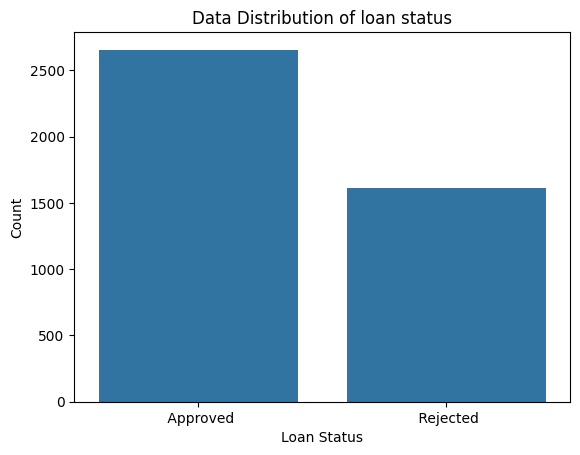

In [ ]:
sns.barplot(data['loan_status'].value_counts())
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Data Distribution of loan status')
plt.show()

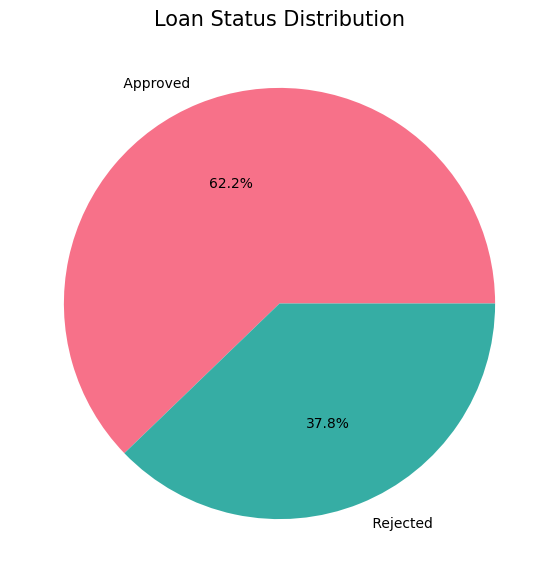

In [ ]:
plt.figure(figsize=(10, 7))
labels = data['loan_status'].value_counts().index.to_list()
colors = sns.color_palette('husl', len(labels))
plt.pie(data['loan_status'].value_counts(), labels=labels, colors=colors, autopct='%.1f%%')
plt.title('Loan Status Distribution', fontsize=15)
plt.show()


Relationship between features

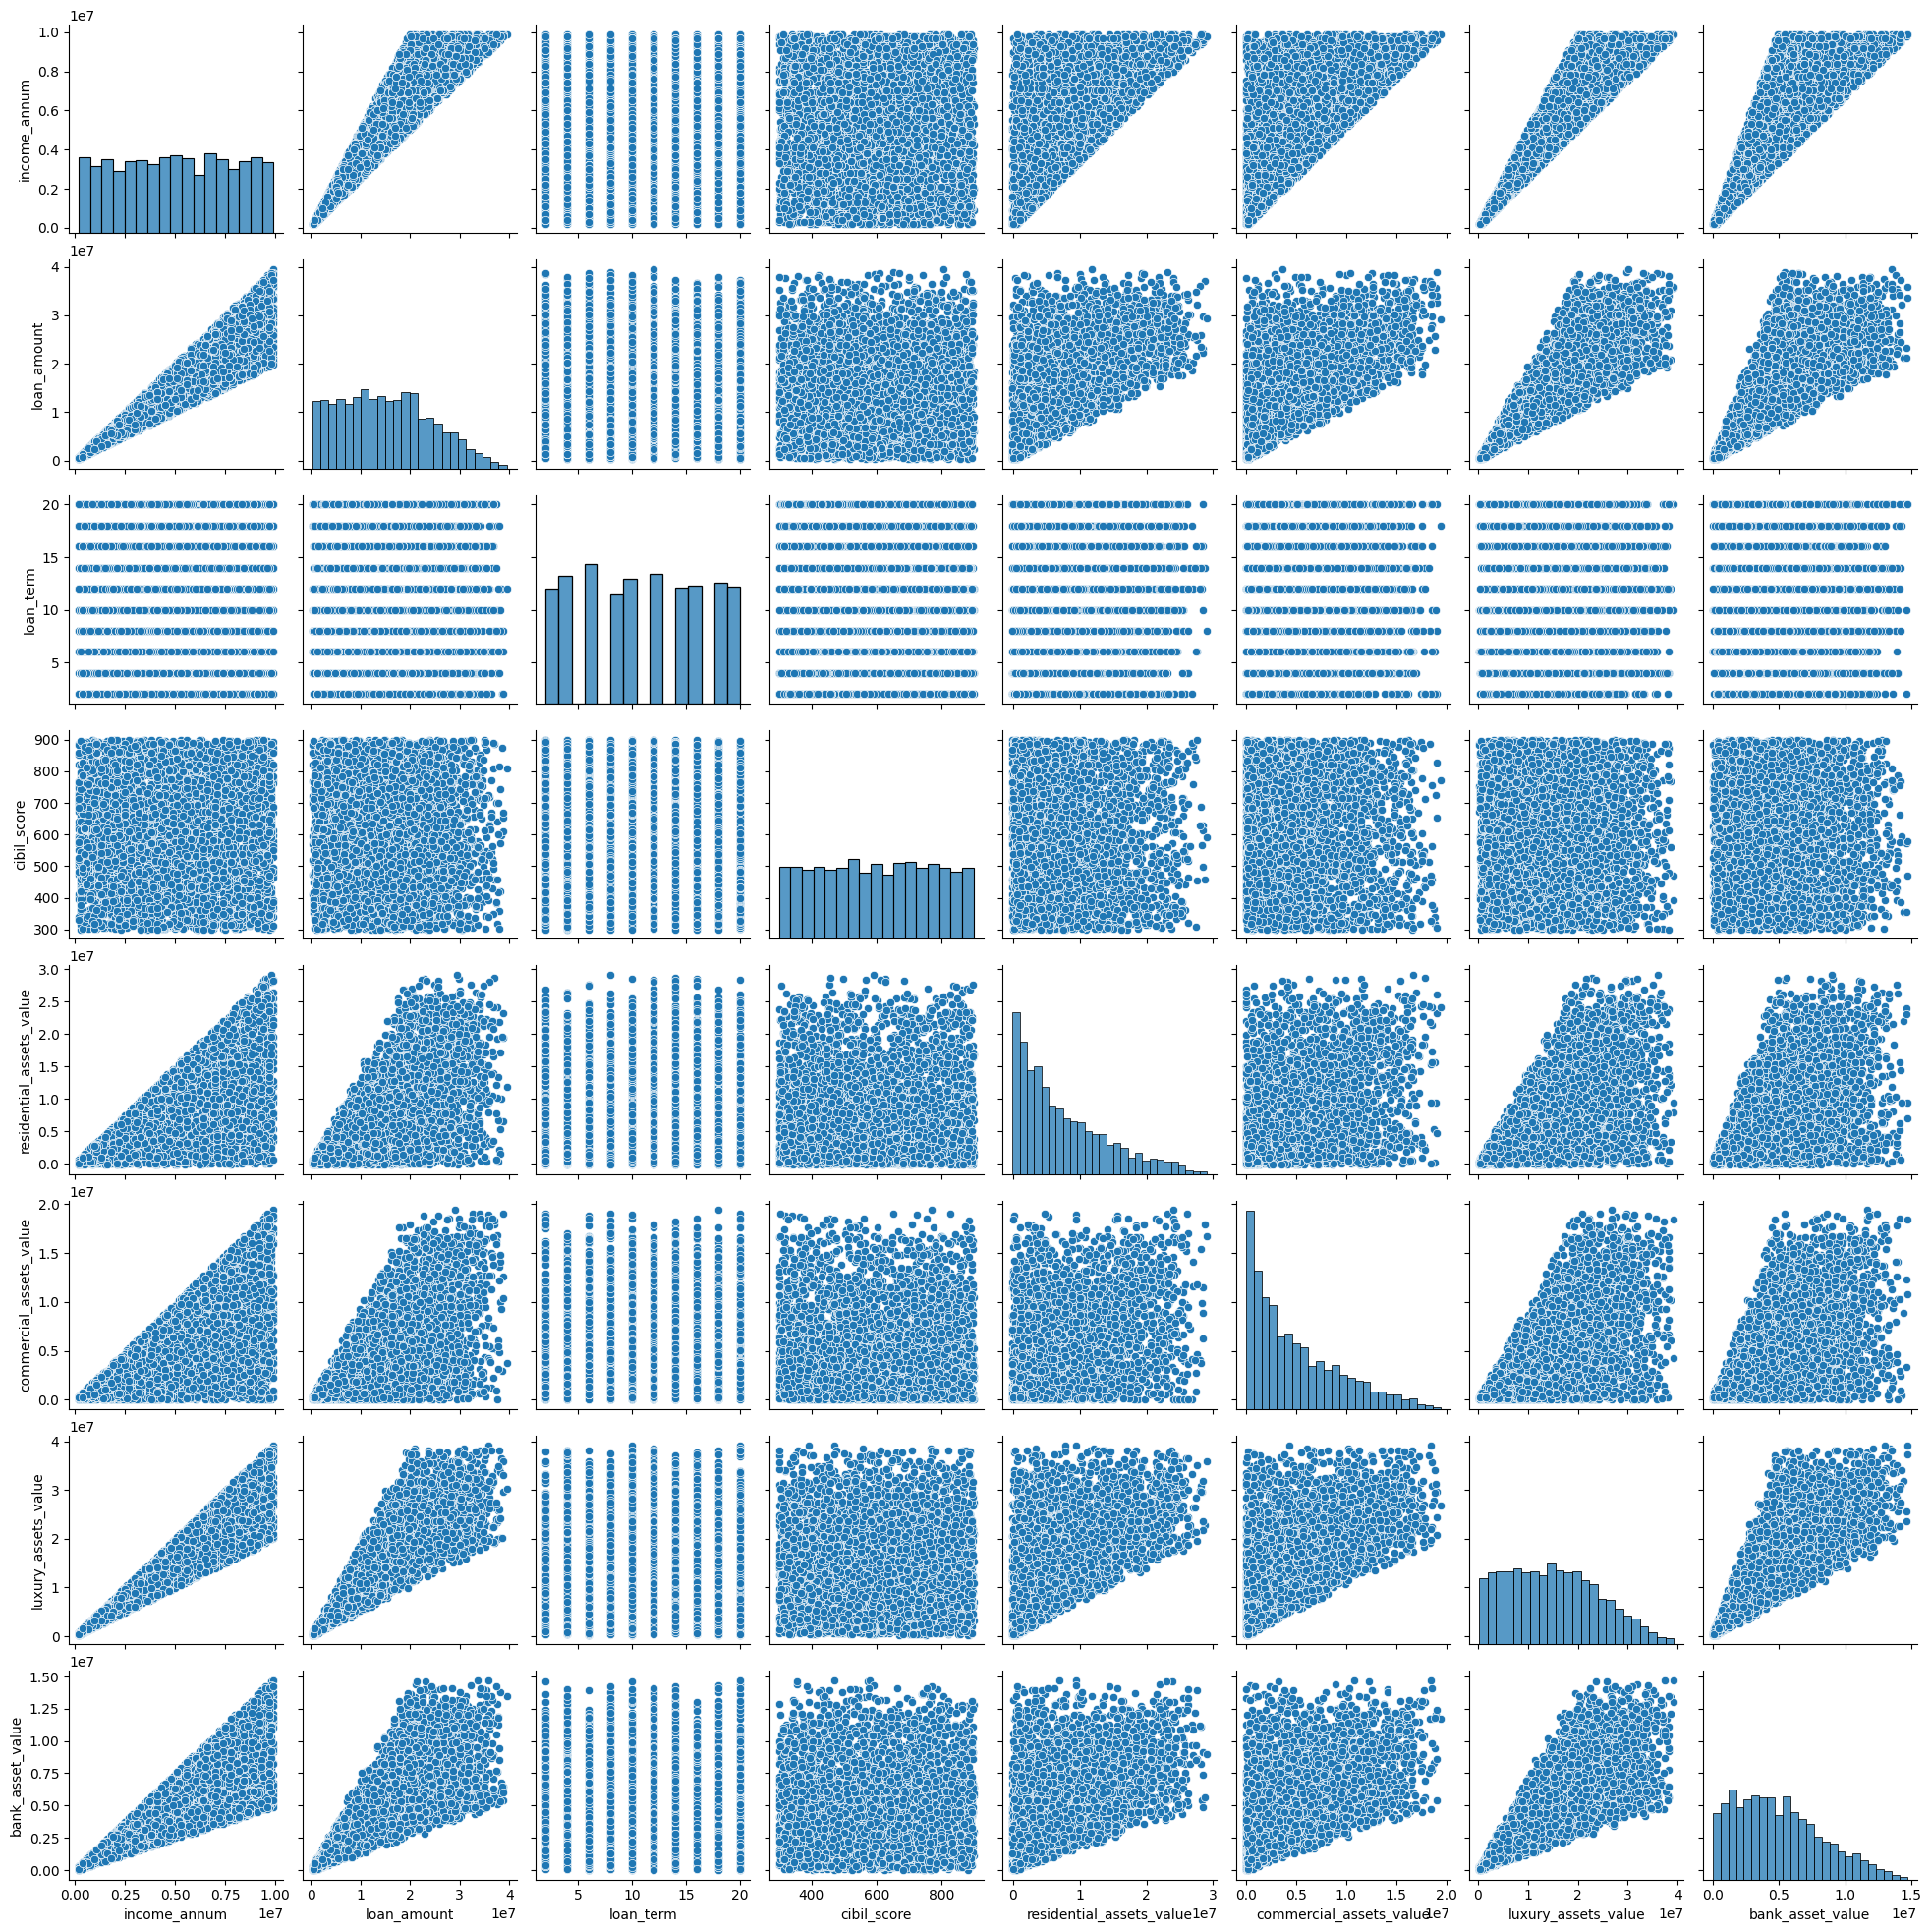

In [ ]:
sns.pairplot(data)
plt.show()

## Data Encoding

In [ ]:
data['loan_status'] = data['loan_status'].replace({' Approved':1,' Rejected':0})

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='first')

# Fit and transform the 'education' and 'self_employed' columns
encoded_features = encoder.fit_transform(data[['education', 'self_employed']])

# Get the feature names
encoded_feature_names = encoder.get_feature_names_out(['education', 'self_employed'])

# Create a DataFrame with the encoded features
encoded_data = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate the original DataFrame and the encoded features
data_encoded = pd.concat([data.drop(['education', 'self_employed'], axis=1), encoded_data], axis=1)

data_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0.0,0.0
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1.0,1.0
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0.0,0.0
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0.0,0.0
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1.0,1.0


## Data Correlation

<Axes: >

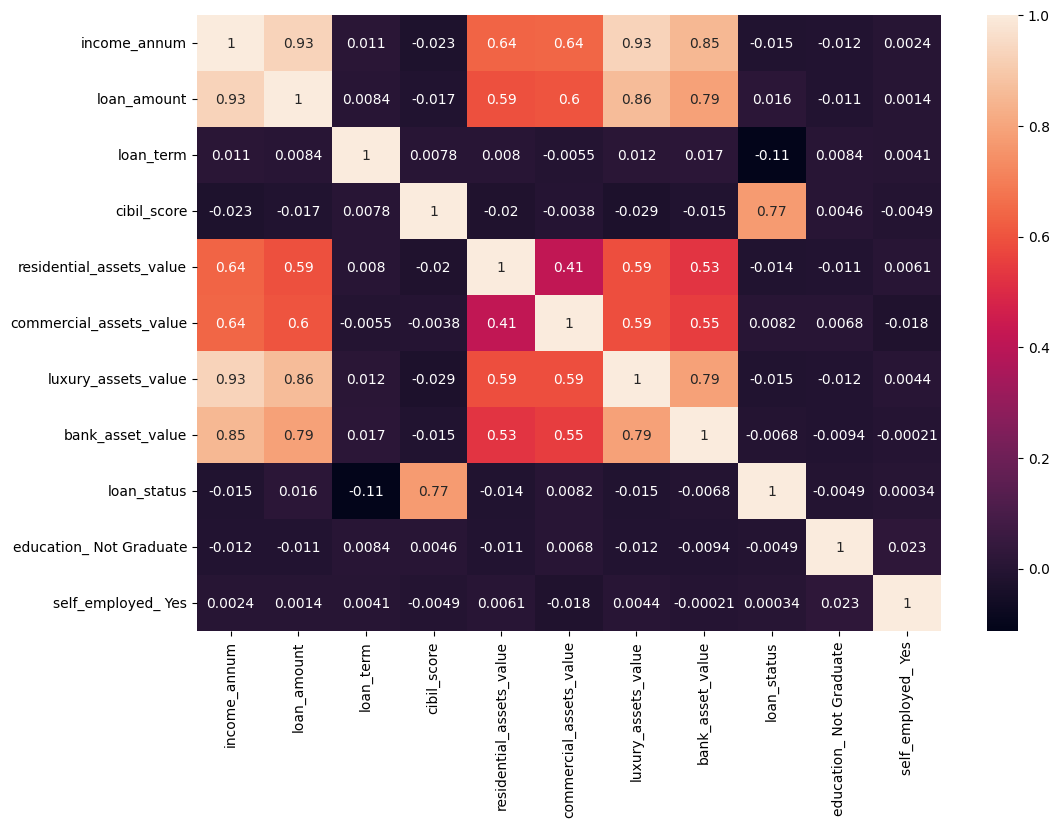

In [ ]:
corr = data_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data_encoded.drop('loan_status', axis=1))

# Create a new DataFrame with the scaled features
data_scaled = pd.DataFrame(scaled_features, columns=data_encoded.drop('loan_status', axis=1).columns)

# Concatenate the original DataFrame and the scaled features
data = pd.concat([data_scaled, data_encoded['loan_status']], axis=1)

data.head()


,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status
0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0.0,0.0,1
1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1.0,1.0,0
2,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0.0,0.0,0
3,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0.0,0.0,0
4,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1.0,1.0,0


## Filter Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Select features using chi-squared test
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Print the selected features
print('Selected features:', selected_features)


Selected features: Index(['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_ Not Graduate',
       'self_employed_ Yes'],
      dtype='object')


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x = data[selected_features]
y = data['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 10)
(1281, 10)
(2988,)
(1281,)


## Check if the target training data is balanced

In [ ]:
train_percentage = y_train.value_counts(normalize=True) * 100
print(train_percentage)


loan_status
1    61.780455
0    38.219545
Name: proportion, dtype: float64


### Balance the data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Balance the training data using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Check the class distribution of the training data
print(f'Training data class distribution after SMOTE: {y_train.value_counts(normalize=True)}')


Training data class distribution after SMOTE: loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64


## Evaluation Metrics Function

In [ ]:
from sklearn.metrics import precision_score, classification_report, accuracy_score,f1_score,confusion_matrix
def evaluation_metrics(y_test,y_pred):
  accuracy = accuracy_score(y_test,y_pred)
  fscore = f1_score(y_test,y_pred)
  classification= classification_report(y_test,y_pred)
  confusion= confusion_matrix(y_test,y_pred)
  precision = precision_score(y_test,y_pred)



  print('Accuracy: ',accuracy *100)
  print('F1 Score: ',fscore *100)
  print('Precision Score: ',precision *100)
  print('Classification Report:\n',classification)

  sns.heatmap(confusion, annot=True, linewidths=0.1, linecolor="white", fmt='.0f')
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

## Model Selection

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

SVC()

Accuracy:  92.27166276346604
F1 Score:  93.67412140575078
Precision Score:  97.08609271523179
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       471
           1       0.97      0.90      0.94       810

    accuracy                           0.92      1281
   macro avg       0.91      0.93      0.92      1281
weighted avg       0.93      0.92      0.92      1281



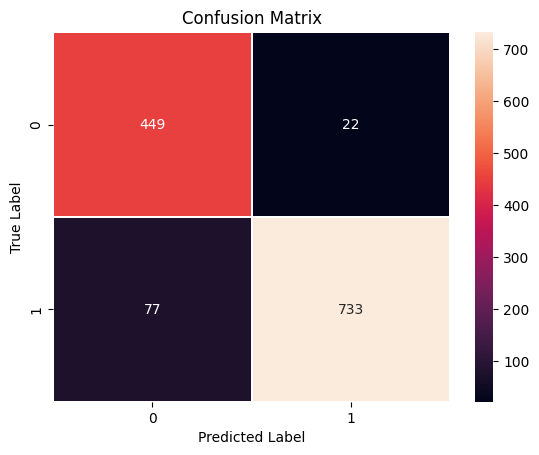

In [ ]:
y_pred = svm.predict(X_test)
evaluation_metrics(y_test,y_pred)

## Using Wrapper Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
model = SVC(kernel = 'linear')
rfe = RFE(estimator=model, n_features_to_select=6)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


Accuracy:  94.2232630757221
F1 Score:  95.32828282828284
Precision Score:  97.5452196382429
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       471
           1       0.98      0.93      0.95       810

    accuracy                           0.94      1281
   macro avg       0.93      0.95      0.94      1281
weighted avg       0.94      0.94      0.94      1281



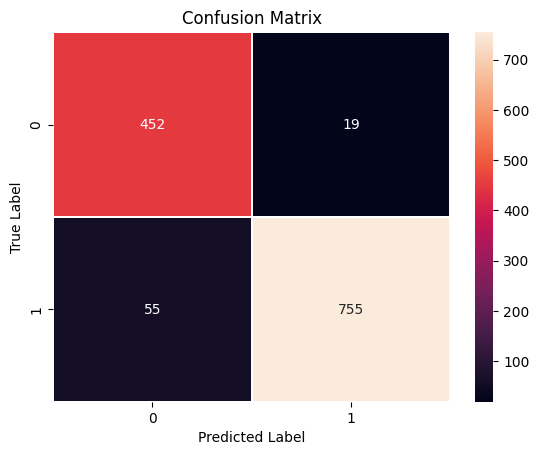

In [ ]:
# Train the model with the selected features
svm.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_rfe = svm.predict(X_test_rfe)

# Evaluate the model
evaluation_metrics(y_test, y_pred_rfe)

## Hybrid Feature Selection

In [ ]:
# Step 1: Select features using chi-squared test
selector = SelectKBest(chi2, k=10)
X_selected_chi2 = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features_chi2 = X.columns[selector.get_support()].tolist()

# Step 2: Use RFE to further reduce the number of features
model = SVC(kernel='linear')
rfe = RFE(estimator=model, n_features_to_select=6)
rfe.fit(X_selected_chi2, y)

# Get the boolean mask of selected features from RFE
rfe_support = rfe.support_

# Step 3: Retrieve the selected feature names based on the RFE mask
selected_features_hybrid = np.array(selected_features_chi2)[rfe_support]

# Print the selected features
print('Selected features after hybrid selection:', selected_features_hybrid)

Selected features after hybrid selection: ['income_annum' 'loan_amount' 'loan_term' 'cibil_score'
 'commercial_assets_value' 'bank_asset_value']


In [ ]:
# Extract the selected features from the original dataset
X_train_hybrid = X_train[selected_features_hybrid]
X_test_hybrid = X_test[selected_features_hybrid]

In [ ]:
# Train the model with the selected features after hybrid selection
svm_hybrid = SVC()
svm_hybrid.fit(X_train_hybrid, y_train)

SVC()

Accuracy:  94.92583918813428
F1 Score:  95.9093769666457
Precision Score:  97.81771501925546
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       471
           1       0.98      0.94      0.96       810

    accuracy                           0.95      1281
   macro avg       0.94      0.95      0.95      1281
weighted avg       0.95      0.95      0.95      1281



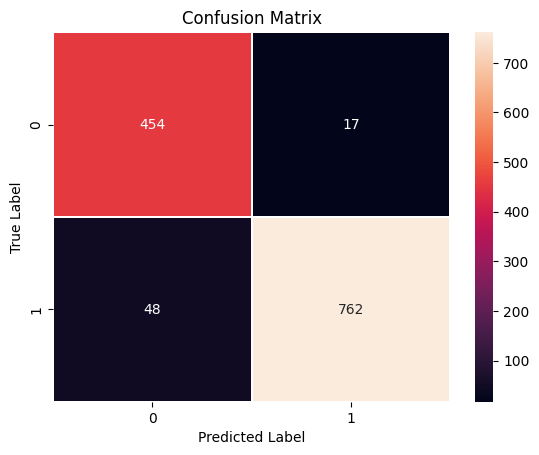

In [ ]:
# Predict on the test set
y_pred_hybrid = svm_hybrid.predict(X_test_hybrid)

# Evaluate the model
evaluation_metrics(y_test, y_pred_hybrid)

## Prediction

In [ ]:
# New data point
new_data = {
  'education':' Graduate',
 'self_employed':' No',
 'income_annum':9600000,
 'loan_amount':29900000,
 "loan_term":12,
 'cibil_score':778,
 'residential_assets_value':2400000,
 'commercial_assets_value':17600000,
 'luxury_assets_value':22700000,
 'bank_asset_value':8000000,
  }
# Convert new data to DataFrame
new_df = pd.DataFrame([new_data])

# Encode categorical features
encoded_features = encoder.transform(new_df[['education', 'self_employed']])
encoded_feature_names = encoder.get_feature_names_out(['education', 'self_employed'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine original and encoded features
new_data_encoded = pd.concat([new_df.drop(['education', 'self_employed'], axis=1), encoded_df], axis=1)

# Scale the data
scaled_data = scaler.transform(new_data_encoded)

# Select features using RFE
selected_features = X_train_hybrid.columns
new_data_selected = new_data_encoded[selected_features]

# Predict
prediction = svm_hybrid.predict(new_data_selected)

if prediction[0] == 1:
  print('Loan approved')
else:
  print('Loan rejected')


Loan approved
